In [376]:
# importing required libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline
from sklearn.cluster import KMeans

Data of Car Sales from Craiglist, filterd down to the latatude and longitude for the advertisement.

In [377]:
# reading the data and looking at the first five rows of the data
#data=pd.read_csv("Wholesale customers data.csv")
data=pd.read_csv("LatLong.csv")
data.head()

,lat,long
0,29.6577,-81.6595
1,31.0710,-97.3898
2,31.0710,-97.3898
3,40.1827,-81.0451
4,40.4845,-81.4358


The aim of this problem is to segment the clients of a wholesale distributor based on their annual spending on diverse product categories, like milk, grocery, region, etc. So, let’s start coding!

We have the spending details of customers on different products like Milk, Grocery, Frozen, Detergents, etc. Now, we have to segment the customers based on the provided details. Before doing that, let’s pull out some statistics related to the data:

In [378]:
# statistics of the data
data.describe()

,lat,long
count,39352.000000,39352.000000
mean,36.885930,-91.447833
std,5.722752,16.342274
min,25.655600,-123.823000
25%,33.245200,-97.866600
50%,37.259300,-84.411800
75%,41.637300,-80.215300
max,46.234800,-67.407300


Here, we see that there is a lot of variation in the magnitude of the data. Variables like Channel and Region have low magnitude whereas variables like Fresh, Milk, Grocery, etc. have a higher magnitude.

Since K-Means is a distance-based algorithm, this difference of magnitude can create a problem. So let’s first bring all the variables to the same magnitude:

In [379]:
# standardizing the data
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
data_scaled = scaler.fit_transform(data)

# statistics of scaled data
data_s=pd.DataFrame(data_scaled).describe()
data_s

,0,1
count,3.935200e+04,3.935200e+04
mean,-1.979093e-15,8.624513e-16
std,1.000013e+00,1.000013e+00
min,-1.962425e+00,-1.981094e+00
25%,-6.361932e-01,-3.927757e-01
50%,6.524394e-02,4.305474e-01
75%,8.302702e-01,6.873386e-01
max,1.633653e+00,1.471083e+00


The magnitude looks similar now. Next, let’s create a kmeans function and fit it on the data:

In [380]:

# defining the kmeans function with initialization as k-means++
#kmeans = KMeans(n_clusters=2, init='k-means++')
kmeans = KMeans(n_clusters=5, init='k-means++')

# fitting the k means algorithm on scaled data
kmeans.fit(data_scaled)

KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=5, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

We have initialized two clusters and pay attention – the initialization is not random here. We have used the k-means++ initialization which generally produces better results.

Remember in lecture we said that this algorithm randomly initialize the centroids in k-means clustering? Well, this is also potentially problematic because we might get different clusters every time. So, to solve this problem of random initialization, there is an algorithm called K-Means++ that can be used to choose the initial values, or the initial cluster centroids, for K-Means.

In some cases, if the initialization of clusters is not appropriate, K-Means can result in arbitrarily bad clusters. This is where K-Means++ helps. It specifies a procedure to initialize the cluster centers before moving forward with the standard k-means clustering algorithm.

Using the K-Means++ algorithm, we optimize the step where we randomly pick the cluster centroid. We are more likely to find a solution that is competitive to the optimal K-Means solution while using the K-Means++ initialization.

Let’s evaluate how well the formed clusters are. To do that, we will calculate the inertia of the clusters:

In [381]:
# inertia on the fitted data
kmeans.inertia_

9800.46197549601

 how can we decide the optimum number of clusters? One thing we can do is plot a graph, also known as an elbow curve, where the x-axis will represent the number of clusters and the y-axis will be an evaluation metric. Let’s say inertia for now.

 We got an inertia value of almost 2600. Now, let’s see how we can use the elbow curve to determine the optimum number of clusters in Python.

We will first fit multiple k-means models and in each successive model, we will increase the number of clusters. We will store the inertia value of each model and then plot it to visualize the result:

Text(0, 0.5, 'Inertia')

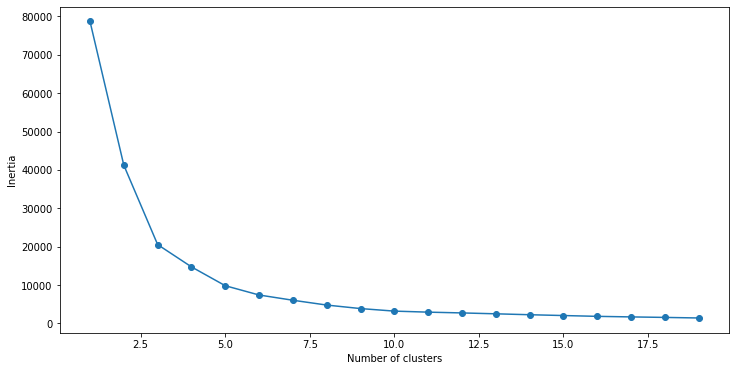

In [382]:
# fitting multiple k-means algorithms and storing the values in an empty list
SSE = []
for cluster in range(1,20):
    kmeans = KMeans(n_jobs = -1, n_clusters = cluster, init='k-means++')
    kmeans.fit(data_scaled)
    SSE.append(kmeans.inertia_)

# converting the results into a dataframe and plotting them
frame = pd.DataFrame({'Cluster':range(1,20), 'SSE':SSE})
plt.figure(figsize=(12,6))
plt.plot(frame['Cluster'], frame['SSE'], marker='o')
plt.xlabel('Number of clusters')
plt.ylabel('Inertia')

Setting up plotter and color array

In [383]:
color_dict = dict({0:'brown',
                   1:'green',
                   2:'orange',
                   3:'red',
                   4:'dodgerblue',
                   5:'black',
                   6:'blue',
                   7:'pink',
                   8:'purple'})

The elbow is between 3 and 8.

This is the cluster map for clusters = 3

Initial clustering with two groups on the top and one group (green) on the bottom

In [384]:
# k means using 3 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 3, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

0    16994
2    13854
1     8504
Name: cluster, dtype: int64

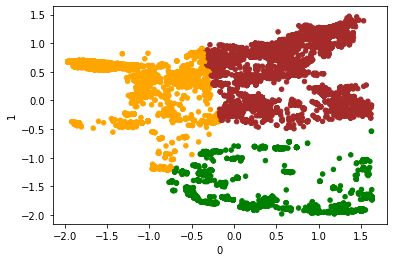

In [385]:
ax1 = frame.plot.scatter(x=0, y=1, c=frame['cluster'].map(color_dict))

This is the cluster map for clusters = 4

Moving from 3 to 4 clusters, the two clusters on the top are now divided into 3 with a small part of the botton cluster added to the center cluster.

In [386]:
# k means using 4 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 4, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()


1    11560
2    11496
3     8482
0     7814
Name: cluster, dtype: int64

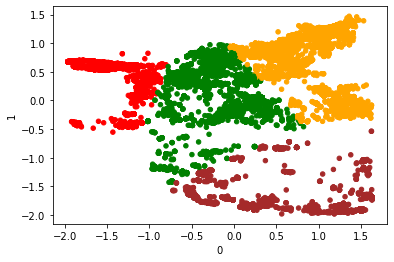

In [387]:
ax1 = frame.plot.scatter(x=0, y=1, c=frame['cluster'].map(color_dict))

This is the cluster map for clusters = 5

Moving from 4 to 5 clusters, the bottom cluster is now divided in two, with the void in the middle of it as the main dividing area.

In [388]:
# k means using 5 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 5, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

3    10946
1    10856
2     8532
0     4810
4     4208
Name: cluster, dtype: int64

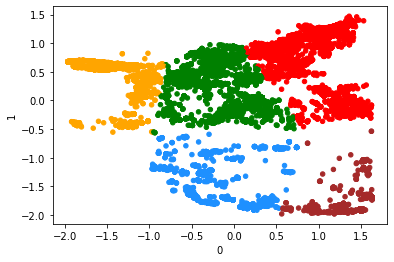

In [389]:
ax1 = frame.plot.scatter(x=0, y=1, c=frame['cluster'].map(color_dict))

This is the cluster map for clusters = 6

Moving from 5 to 6 clusters, the top right cluster is now divided in two, with the two 'fingers' of the cluster seperating.


In [390]:
# k means using 6 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 6, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

2    9033
0    9032
4    8499
1    4809
3    4009
5    3970
Name: cluster, dtype: int64

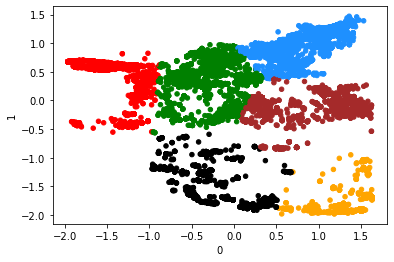

In [371]:
ax1 = frame.plot.scatter(x=0, y=1, c=frame['cluster'].map(color_dict))

This is the cluster map for clusters = 7

Moving from 6 to 7 clusters, the upper center cluster is now divided in two, with the void in the middle of it as the main dividing area.


In [391]:
# k means using 7 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 7, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

3    8926
0    8498
5    6993
1    4808
2    4029
4    3952
6    2146
Name: cluster, dtype: int64

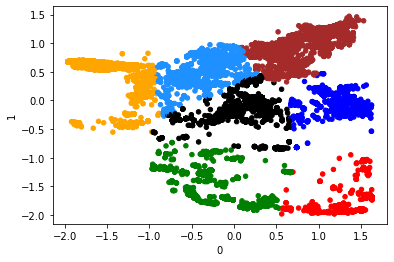

In [373]:
ax1 = frame.plot.scatter(x=0, y=1, c=frame['cluster'].map(color_dict))

This is the cluster map for clusters = 8

Moving from 7 to 8 clusters, the top left cluster is now divided in two, with the two 'fingers' of the cluster seperating.


In [392]:
# k means using 8 clusters and k-means++ initialization
kmeans = KMeans(n_jobs = -1, n_clusters = 8, init='k-means++')
kmeans.fit(data_scaled)
pred = kmeans.predict(data_scaled)

frame = pd.DataFrame(data_scaled)
frame['cluster'] = pred
frame['cluster'].value_counts()

1    8887
6    6658
0    6388
2    4808
5    3928
7    3877
3    2751
4    2055
Name: cluster, dtype: int64

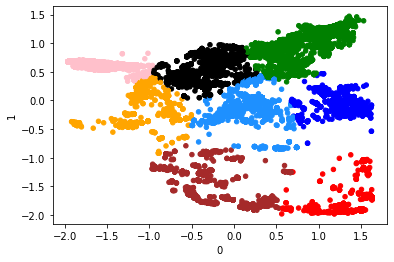

In [375]:
ax1 = frame.plot.scatter(x=0, y=1, c=frame['cluster'].map(color_dict))